In [1]:
#1. (a) prepare datasets
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784')
lfw = fetch_lfw_people(min_faces_per_person=60)

x_lfw=lfw.data
y_lfw=lfw.target
x_lfw_train, x_lfw_test, y_lfw_train, y_lfw_test = train_test_split(x_lfw,y_lfw, test_size = 0.35, random_state=2) 

x_mnist=mnist.data
y_mnist=mnist.target
x_mnist_train, x_mnist_test, y_mnist_train, y_mnist_test = train_test_split(x_mnist,y_mnist, test_size = 0.35, random_state=2) 



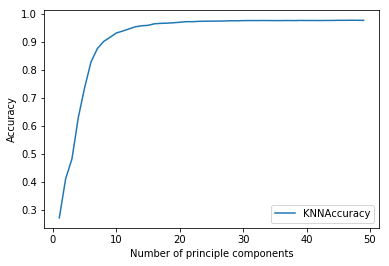

In [12]:
#(b) train and evalute 
# KNN
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

accuracy=[]

components = range(1,50)
for n in components:
    pca = PCA(n_components = n).fit(x_mnist_train)
    x_train_reduced = pca.transform(x_mnist_train)
    x_test_reduced = pca.transform(x_mnist_test)
    model = KNeighborsClassifier()
    model.fit(x_train_reduced, y_mnist_train)
    y_pred = model.predict(x_test_reduced)
    accuracy.append(accuracy_score(y_pred,y_mnist_test))
    
plt.plot(components, accuracy, label = "KNNAccuracy")
plt.xlabel("Number of principle components")
plt.ylabel("Accuracy")
plt.legend()

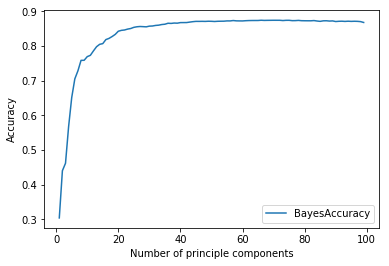

In [9]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

accuracy=[]

components = range(1,100)
for n in components:
    pca = PCA(n_components = n)
    pca.fit(x_mnist_train)
    x_train_reduced = pca.transform(x_mnist_train)
    x_test_reduced = pca.transform(x_mnist_test)
    model = GaussianNB()
    model.fit(x_train_reduced, y_mnist_train)
    y_pred = model.predict(x_test_reduced)
    accuracy.append(accuracy_score(y_pred,y_mnist_test))
    
plt.plot(components, accuracy, label = "BayesAccuracy")
plt.xlabel("Number of principle components")
plt.ylabel("Accuracy")
plt.legend()

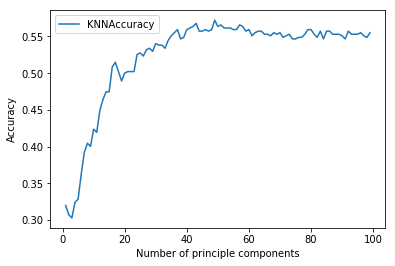

In [10]:
# KNN
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

accuracy=[]

components = range(1,100)
for n in components:
    pca = PCA(n_components = n).fit(x_lfw_train)
    x_train_reduced = pca.transform(x_lfw_train)
    x_test_reduced = pca.transform(x_lfw_test)
    model = KNeighborsClassifier()
    model.fit(x_train_reduced, y_lfw_train)
    y_pred = model.predict(x_test_reduced)
    accuracy.append(accuracy_score(y_pred,y_lfw_test))
    
plt.plot(components, accuracy, label = "KNNAccuracy")
plt.xlabel("Number of principle components")
plt.ylabel("Accuracy")
plt.legend()

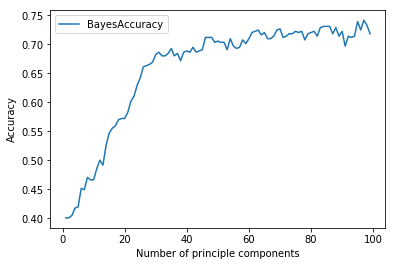

In [7]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

accuracy=[]

components = range(1,100)
for n in components:
    pca = PCA(n_components = n)
    pca.fit(x_lfw_train)
    x_train_reduced = pca.transform(x_lfw_train)
    x_test_reduced = pca.transform(x_lfw_test)
    model = GaussianNB()
    model.fit(x_train_reduced, y_lfw_train)
    y_pred = model.predict(x_test_reduced)
    accuracy.append(accuracy_score(y_pred,y_lfw_test))
    
plt.plot(components, accuracy, label = "BayesAccuracy")
plt.xlabel("Number of principle components")
plt.ylabel("Accuracy")
plt.legend()